<a href="https://colab.research.google.com/github/KirtanaSridharan/TSF-Intership-Tasks/blob/main/TSF_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF TASK - Prediction using Unsupervised Learning**

#### **AUTHOR : Kirtana Sridharan**

The task is to predict the optimal number of clusters in the iris dataset and to represent the same visually.

## **IMPORTING THE NECESSARY LIBRARIS** - 

#### For the creation of data frames and data viz. 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [75]:
import io

iris_df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [76]:
iris_df.head() # to view the first 5 rows in our dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Lets see if our loaded dataset containns any null values

In [77]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since the column 'Id' is of no use for our model prediction, we can drop the column from the dataset

In [78]:
iris_df = iris_df.drop(['Id'], axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
iris_df.describe()  #Viewing the data statistically.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **DATA VISUALIZATION**

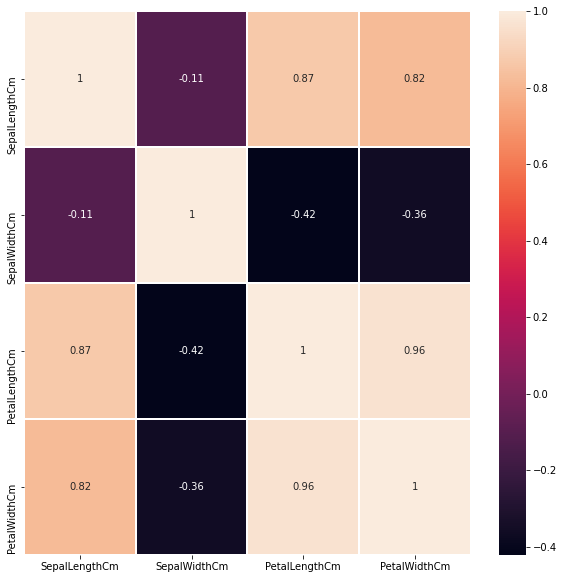

In [8]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(iris_df.corr(),linewidths=1,annot=True)

#### Visualizing the distribution of the Species based on Sepal Length and Sepal Width.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


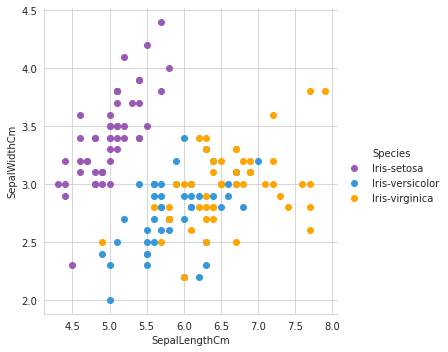

In [64]:
sns.FacetGrid(iris_df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

#### Visualizing the distribution of the Species based on Petal Length and Petal Width.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


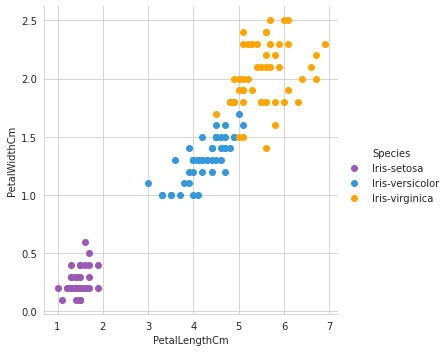

In [66]:
sns.FacetGrid(iris_df, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


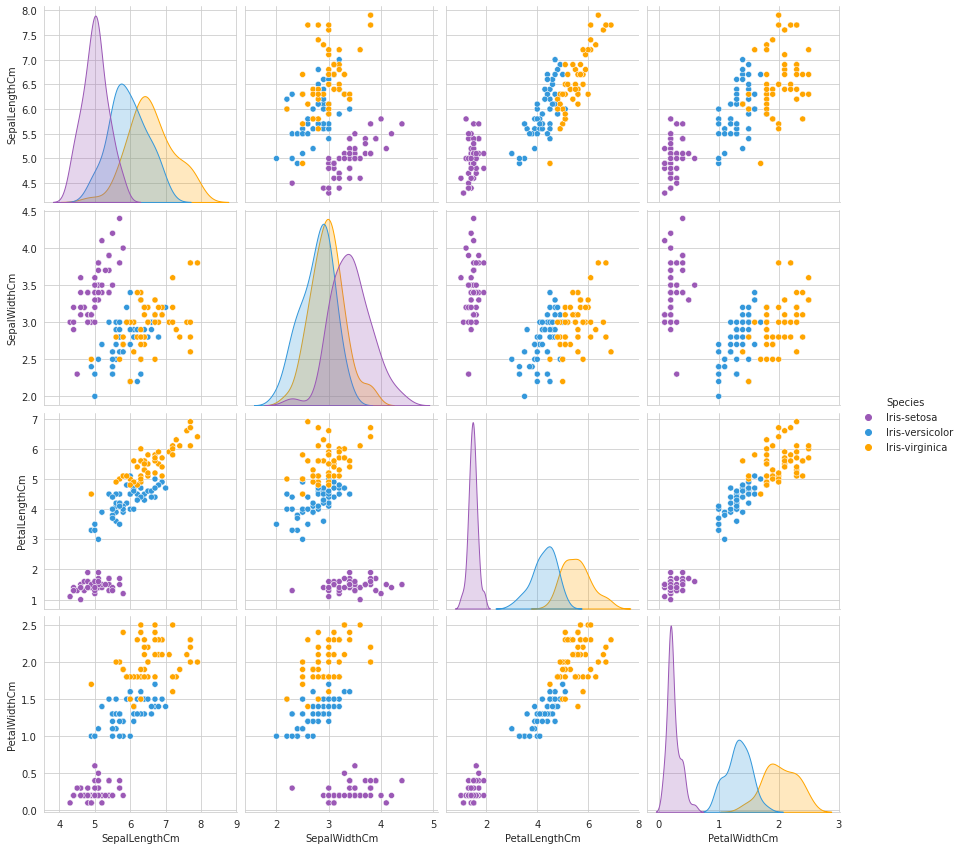

In [65]:
sns.pairplot(iris_df, hue="Species", size=3)
plt.show()

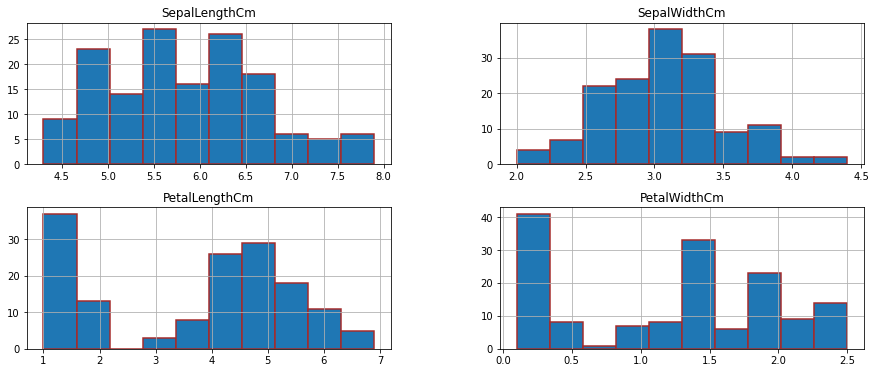

In [10]:
iris_df.hist(linewidth = 1.5, xlabelsize=10, edgecolor='brown')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

LabelEncoder is used to transform the non-numerical target labels to numerical labels with values between the range 0 and n_classes-1.

In [67]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
iris_df['Species'] = encode.fit_transform(iris_df['Species'])
iris_df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## **FINDING THE OPTIMAL NUMBER OF CLUSTERS FOR KMeans**

The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

In [69]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [70]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

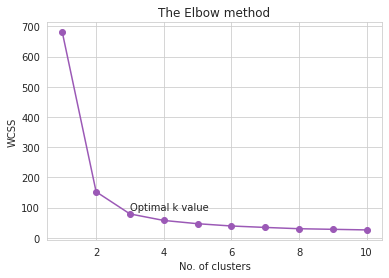

In [81]:
plt.annotate("Optimal k value", (3, 90))

plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

plt.show()

From the above graph , we see that the optimum clusters is where the elbow occurs. This is when the WCSS doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**.

In [83]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## **VISUALIZING THE CLUSTERS**

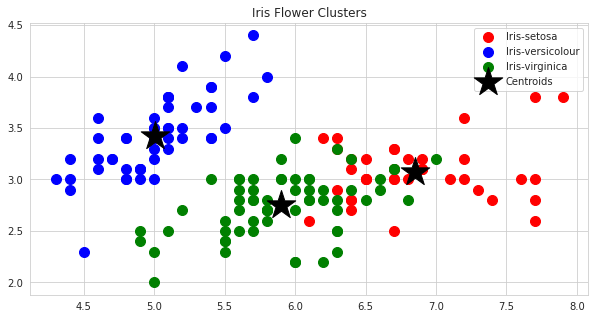

In [86]:

fig = plt.figure(figsize=(10, 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 900, c = 'black', label = 'Centroids', marker='*')
plt.title('Iris Flower Clusters')

plt.legend()